Ejercicio 1

Para funciones cuadráticas $f(x) = \frac{1}{2}x^TAx$ con matrices $A \in \Re$ $10×10$ definidas positivas y diagonales,
elaborar una serie de tests tales que muestren las dificultades del Método del Gradiente con longitud de paso óptima a medida que aumenta el orden de diferencia entre el menor y el mayor autovalor. Sea $t^*_k$ la longitud del paso óptimo en la k-ésima iteración, comparar en cada caso con los resultados obtenidos
tomando:
- $\frac{3}{4}t^*_k$
- $\frac{1}{2}t^*_k$
- $\frac{1}{4}t^*_k$
- $\gamma _k t^*_k$ con $\gamma_k$ un numero aleatorio en (0,1].


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def f(x,A):
    return 0.5*np.dot(x.T,A@x)

In [19]:
def metodo_gradiente_paso_optimo(A,x0,max_iter=1000):
    k=0
    x_k=x0
    d=-A@x0
    y=[]
    while(k<max_iter and np.linalg.norm(d)>10**-8):
        t_optimo=np.dot(d.T,d)/np.dot(d.T,A@d)
        x_k=x_k+t_optimo*d
        d=-A@x_k
        y.append(f(x_k,A))
        k+=1
    return y
def metodo_gradiente_no_optimo(A,x0,alpha,max_iter=1000):
    k=0
    x_k=x0
    d=-A@x0
    y=[]
    while(k<max_iter and np.linalg.norm(d)>10**-8):
        t=alpha*(np.dot(d.T,d)/np.dot(d.T,A@d))
        x_k=x_k+t*d
        d=-A@x_k
        y.append(f(x_k,A))
        k+=1
    return y

Primero vemos como varia la convergencia del metodo al aumentar la diferencia entre los autovalores de la matriz $A$.

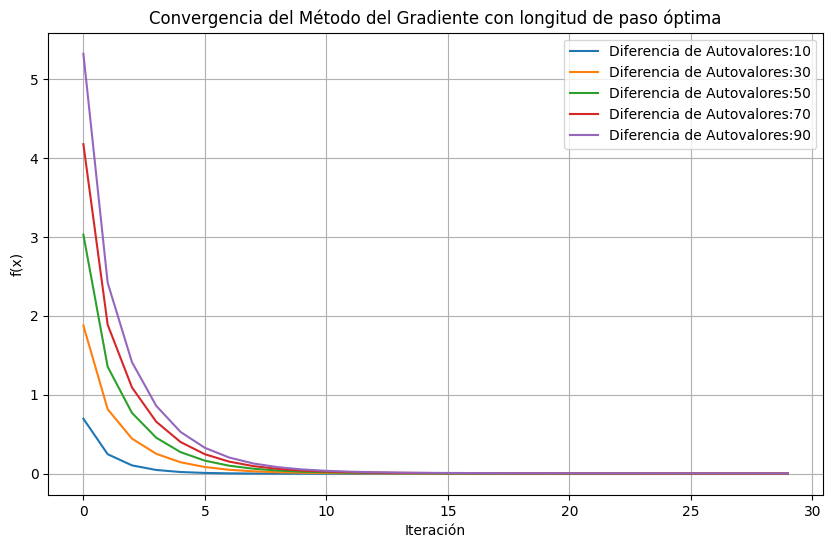

In [53]:
ratios=np.arange(10,100,20)
x0=np.random.rand(10)
plt.figure(figsize=(10,6))
for ratio in ratios:
    autovalores=np.linspace(1,ratio,10)
    A=np.diag(autovalores)
    y=metodo_gradiente_paso_optimo(A,x0,max_iter=30)
    plt.plot(y,label=f"Diferencia de Autovalores:{ratio}")
plt.xlabel("Iteración")
plt.ylabel("f(x)")
plt.legend()
plt.title("Convergencia del Método del Gradiente con longitud de paso óptima")
plt.grid()
plt.show()
    

Ahora veamos que pasa al tomar otro paso $t_k$.

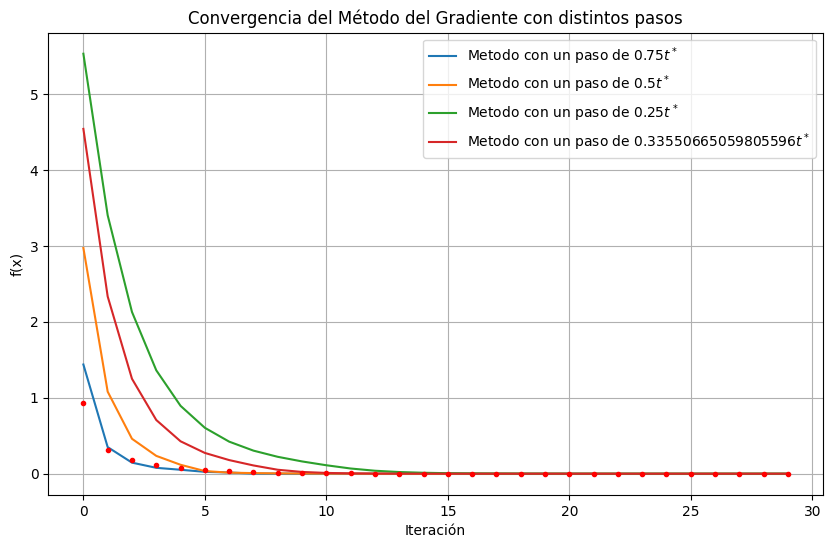

In [51]:
alphas=[3/4,1/2,1/4,np.random.rand()]
x0=np.random.rand(10)
plt.figure(figsize=(10,6))
for alpha in alphas:
    autovalores=np.linspace(1,10,10)
    A=np.diag(autovalores)
    y_optimo=metodo_gradiente_paso_optimo(A,x0,max_iter=30)
    y_no_optimo=metodo_gradiente_no_optimo(A,x0,alpha=alpha,max_iter=30)
    plt.plot(y_no_optimo,label=f"Metodo con un paso de {alpha}$t^*$")
plt.plot(y_optimo,".",color="red")
plt.xlabel("Iteración")
plt.ylabel("f(x)")
plt.legend()
plt.title("Convergencia del Método del Gradiente con distintos pasos")
plt.grid()
plt.show()
    